In [1]:
import pyspark
sc = pyspark.SparkContext()

In [2]:
import random
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
data = sc.parallelize(list(range(0,10000)))
data.persist()
data.first()

0

In [9]:
len_data = data.count()

In [10]:
A = data.filter(lambda x: x % 2 == 1)
sel_A = A.count() / len_data
sel_A

0.5

In [16]:
#A,B
sel_B = np.arange(0.1,1.1,0.1)
reorder = []
not_reorder = []
for x in sel_B:
    startA = datetime.now()
    A = data.filter(lambda x: x % 2 == 1)
    A.persist()
    A.first()
    stopA = datetime.now()
    costA =  ((stopA - startA).seconds * 10**6 + (stopA - startA).microseconds) / len_data
    startB = datetime.now()
    B = A.sample(False,x)
    B.first()
    stopB = datetime.now()
    costB = ((stopB - startB).seconds * 10**6 + (stopB - startB).microseconds) / len_data
    tp1 = 1 / (costA + sel_A * costB)
    A.unpersist()
    
    startB = datetime.now()
    B = data.sample(False,x)
    B.persist()
    B.first()
    stopB = datetime.now()
    costB = ((stopB - startB).seconds * 10**6 + (stopB - startB).microseconds) / len_data
    startA = datetime.now()
    A = data.filter(lambda x: x % 2 == 1)
    A.first()
    stopA = datetime.now()
    costA = ((stopA - startA).seconds * 10**6 + (stopA - startA).microseconds) / len_data
    tp2 = 1 / (costB + x * costA)
    B.unpersist()
    reorder.append(tp2 / tp1)
    not_reorder.append(tp1 / tp1)
    

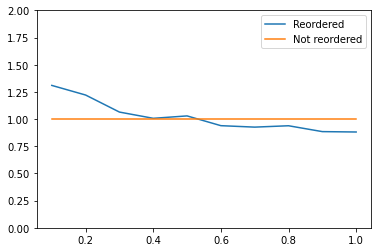

In [50]:
plt.figure()
plt.plot(sel_B,reorder)
plt.plot(sel_B, not_reorder)
plt.ylim(0, 2)
plt.legend(['Reordered','Not reordered'])
plt.show()